Further Analysis from the EDA i performed on the Aircraft Engine Project:

"To gain a deeper understanding of the factors influencing engine health and failure, it would be helpful to consider additional variables such as temperature, pressure, rotational speed, and workload.
Analyzing the correlation between these variables and engine health could provide insights into the root causes of engine failure.
Comparing the performance of different engines under similar operating conditions could help identify any design or maintenance issues.

The clear daily cycle suggests that engine health is influenced by factors that vary predictably over the course of a day, such as temperature, workload, or operational patterns. This information could be valuable for optimizing engine performance and scheduling maintenance activities and so we will be freaching out to our stakeholders for these addional features we will be needing."


Well, the stakeholders provided additional features to aid indept analysis and to build robust model to predict if an aircraft engine requires maintenance based on input parameters

### 1. Import Necessary Libraries

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X_train, y_train are your training data and labels


warnings.filterwarnings("ignore")


### 2. Load the Dataset

In [5]:
data = pd.read_csv(r"C:\Users\igho\Desktop\10\Repositories by Me\Aircraft Engine Maintenance Supervised ML python\aircraft_engine_maintenance_supervised_learning.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           720 non-null    int64  
 1   Engine_ID            720 non-null    int64  
 2   Timestamp            720 non-null    object 
 3   Temperature          686 non-null    float64
 4   Pressure             681 non-null    float64
 5   Rotational_Speed     720 non-null    float64
 6   Engine_Health        720 non-null    float64
 7   Fuel_Consumption     650 non-null    float64
 8   Vibration_Level      720 non-null    float64
 9   Oil_Temperature      720 non-null    float64
 10  Altitude             720 non-null    float64
 11  Humidity             720 non-null    float64
 12  Maintenance_Needed   720 non-null    int64  
 13  Remaining_used_life  720 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 78.9+ KB


### 3. Data Preprocessing

In [8]:
## 3.1 Convert 'Timestamp' from object to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           720 non-null    int64         
 1   Engine_ID            720 non-null    int64         
 2   Timestamp            720 non-null    datetime64[ns]
 3   Temperature          686 non-null    float64       
 4   Pressure             681 non-null    float64       
 5   Rotational_Speed     720 non-null    float64       
 6   Engine_Health        720 non-null    float64       
 7   Fuel_Consumption     650 non-null    float64       
 8   Vibration_Level      720 non-null    float64       
 9   Oil_Temperature      720 non-null    float64       
 10  Altitude             720 non-null    float64       
 11  Humidity             720 non-null    float64       
 12  Maintenance_Needed   720 non-null    int64         
 13  Remaining_used_life  720 non-null  

<Axes: >

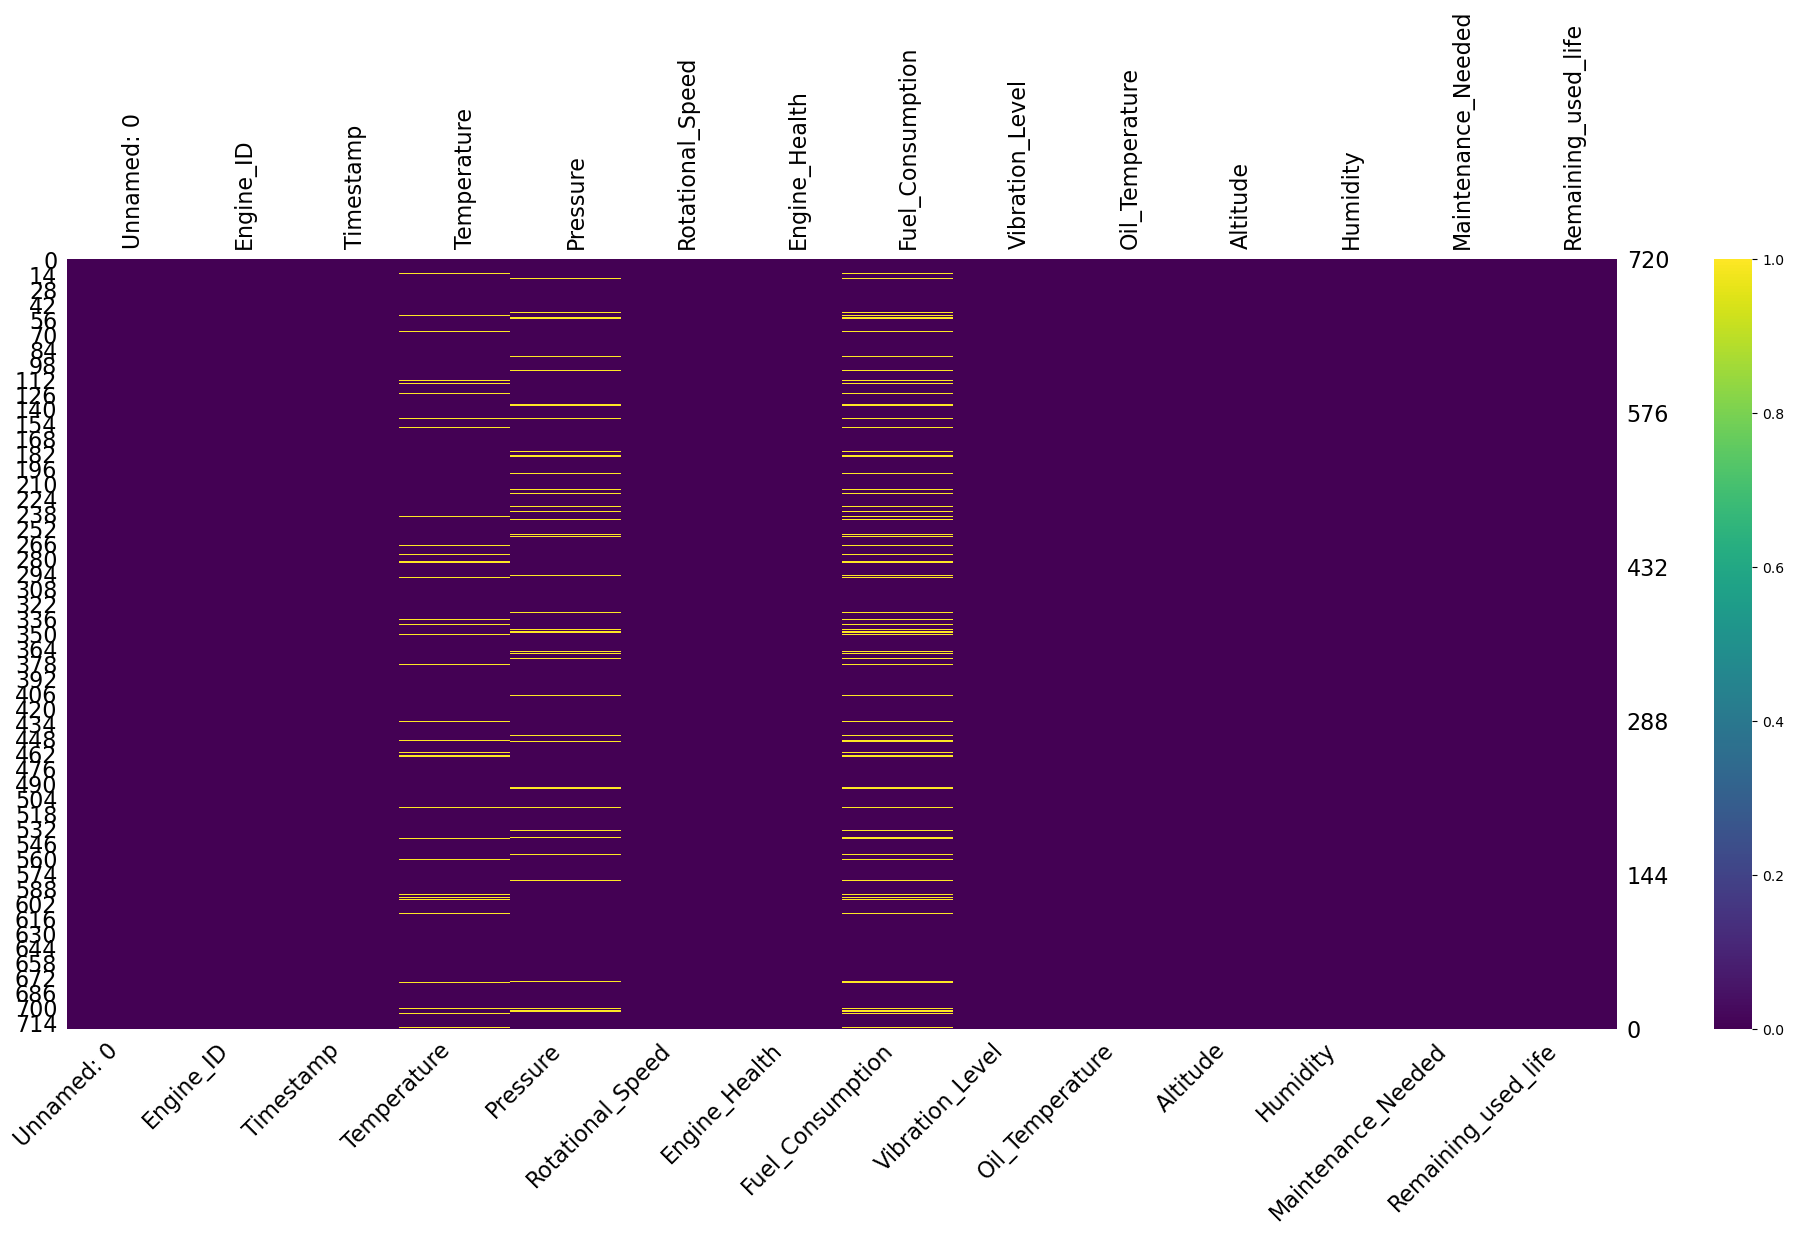

In [9]:
## 3.2 Visualize Missing Values
msno.bar(data, color='blue')
sns.heatmap(data.isnull(), cmap="viridis")


In [10]:
## 3.3 Impute Missing Values in Numerical Columns
numerical_columns = ["Engine_ID", "Temperature", "Pressure", "Rotational_Speed", "Engine_Health",
                    'Fuel_Consumption', 'Vibration_Level', 'Oil_Temperature', 'Altitude',
                     'Humidity', 'Maintenance_Needed']

data.fillna(data[numerical_columns].median(), inplace=True)
data.isnull().sum()

Unnamed: 0             0
Engine_ID              0
Timestamp              0
Temperature            0
Pressure               0
Rotational_Speed       0
Engine_Health          0
Fuel_Consumption       0
Vibration_Level        0
Oil_Temperature        0
Altitude               0
Humidity               0
Maintenance_Needed     0
Remaining_used_life    0
dtype: int64

### 4. Exploratory Data Analysis (EDA)

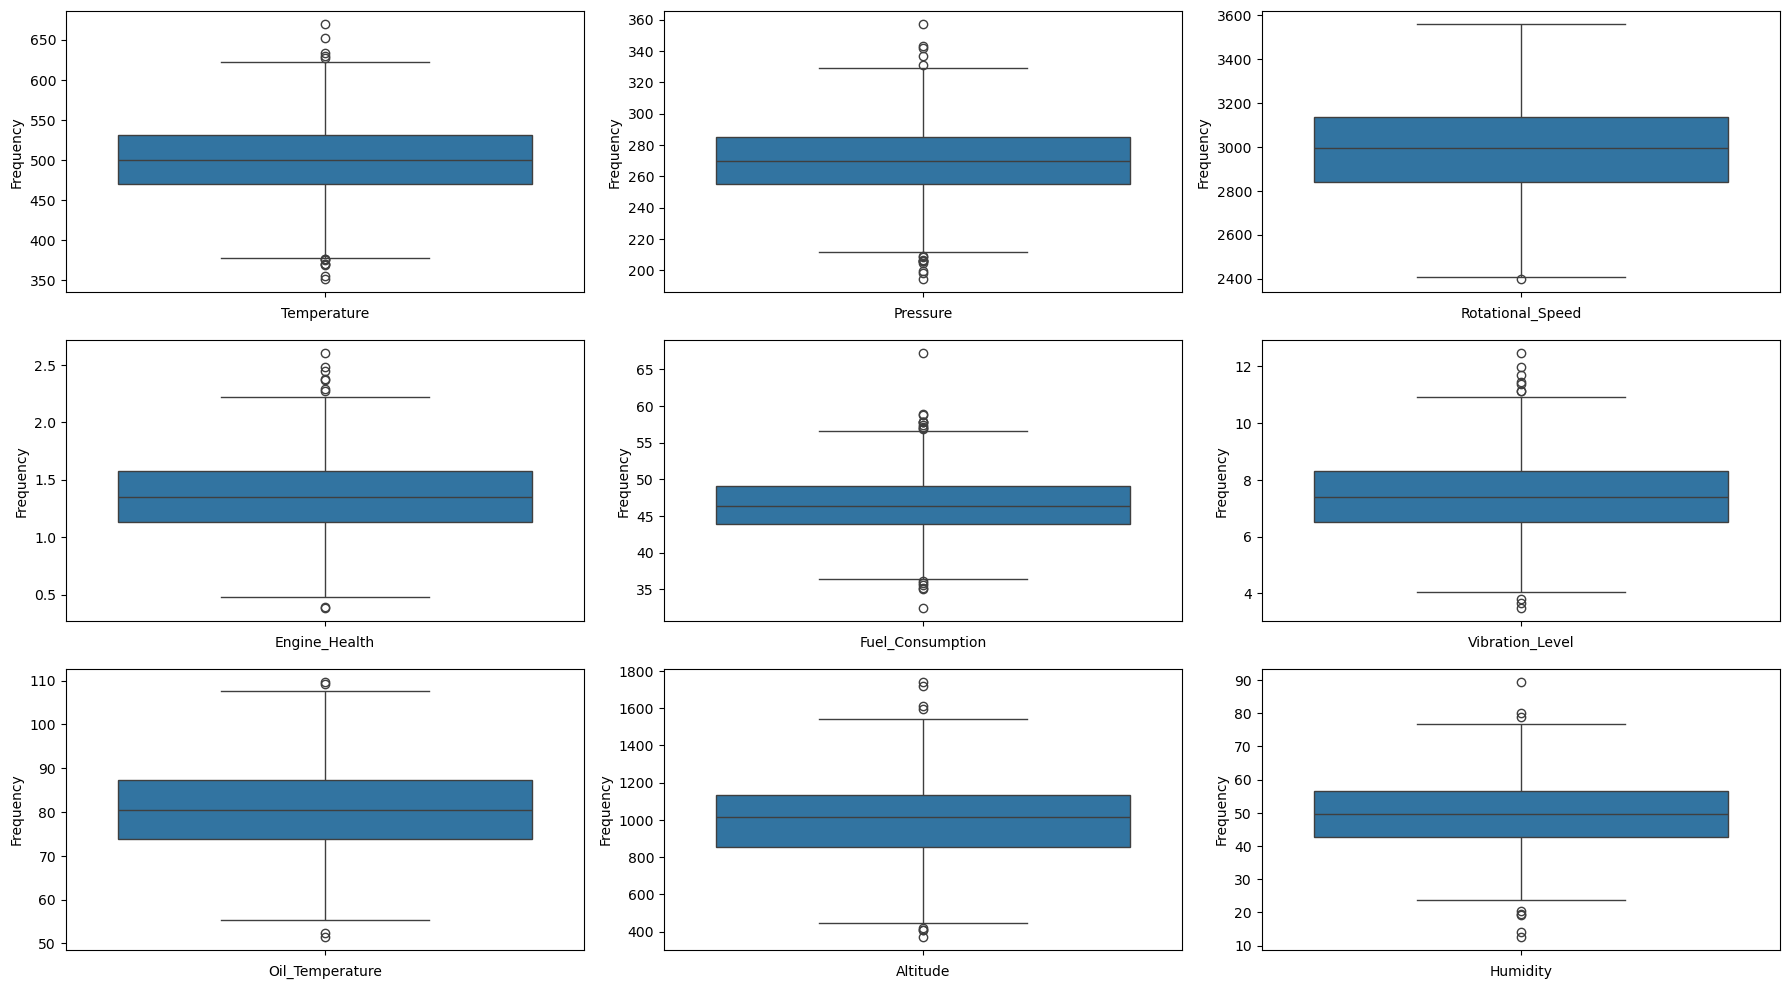

In [12]:
## 4.1 Univariate Analysis - Boxplots for Numerical Columns
columns_to_check = ['Temperature', 'Pressure', 'Rotational_Speed', 'Engine_Health', 'Fuel_Consumption',
                    'Vibration_Level', 'Oil_Temperature', 'Altitude', 'Humidity']

plt.figure(figsize=(18, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

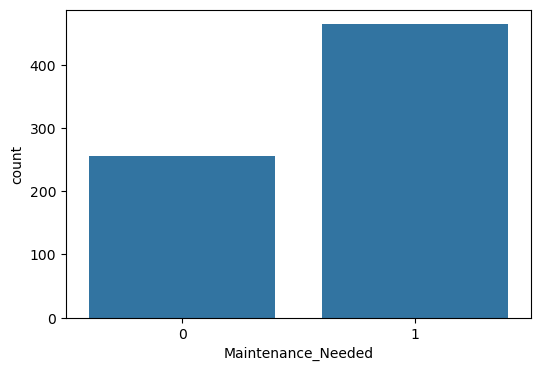

Maintenance_Needed
1    464
0    256
Name: count, dtype: int64


In [13]:
## 4.2 Univariate Analysis - Countplot for 'Maintenance_Needed'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="Maintenance_Needed")
plt.show()

print(data['Maintenance_Needed'].value_counts())

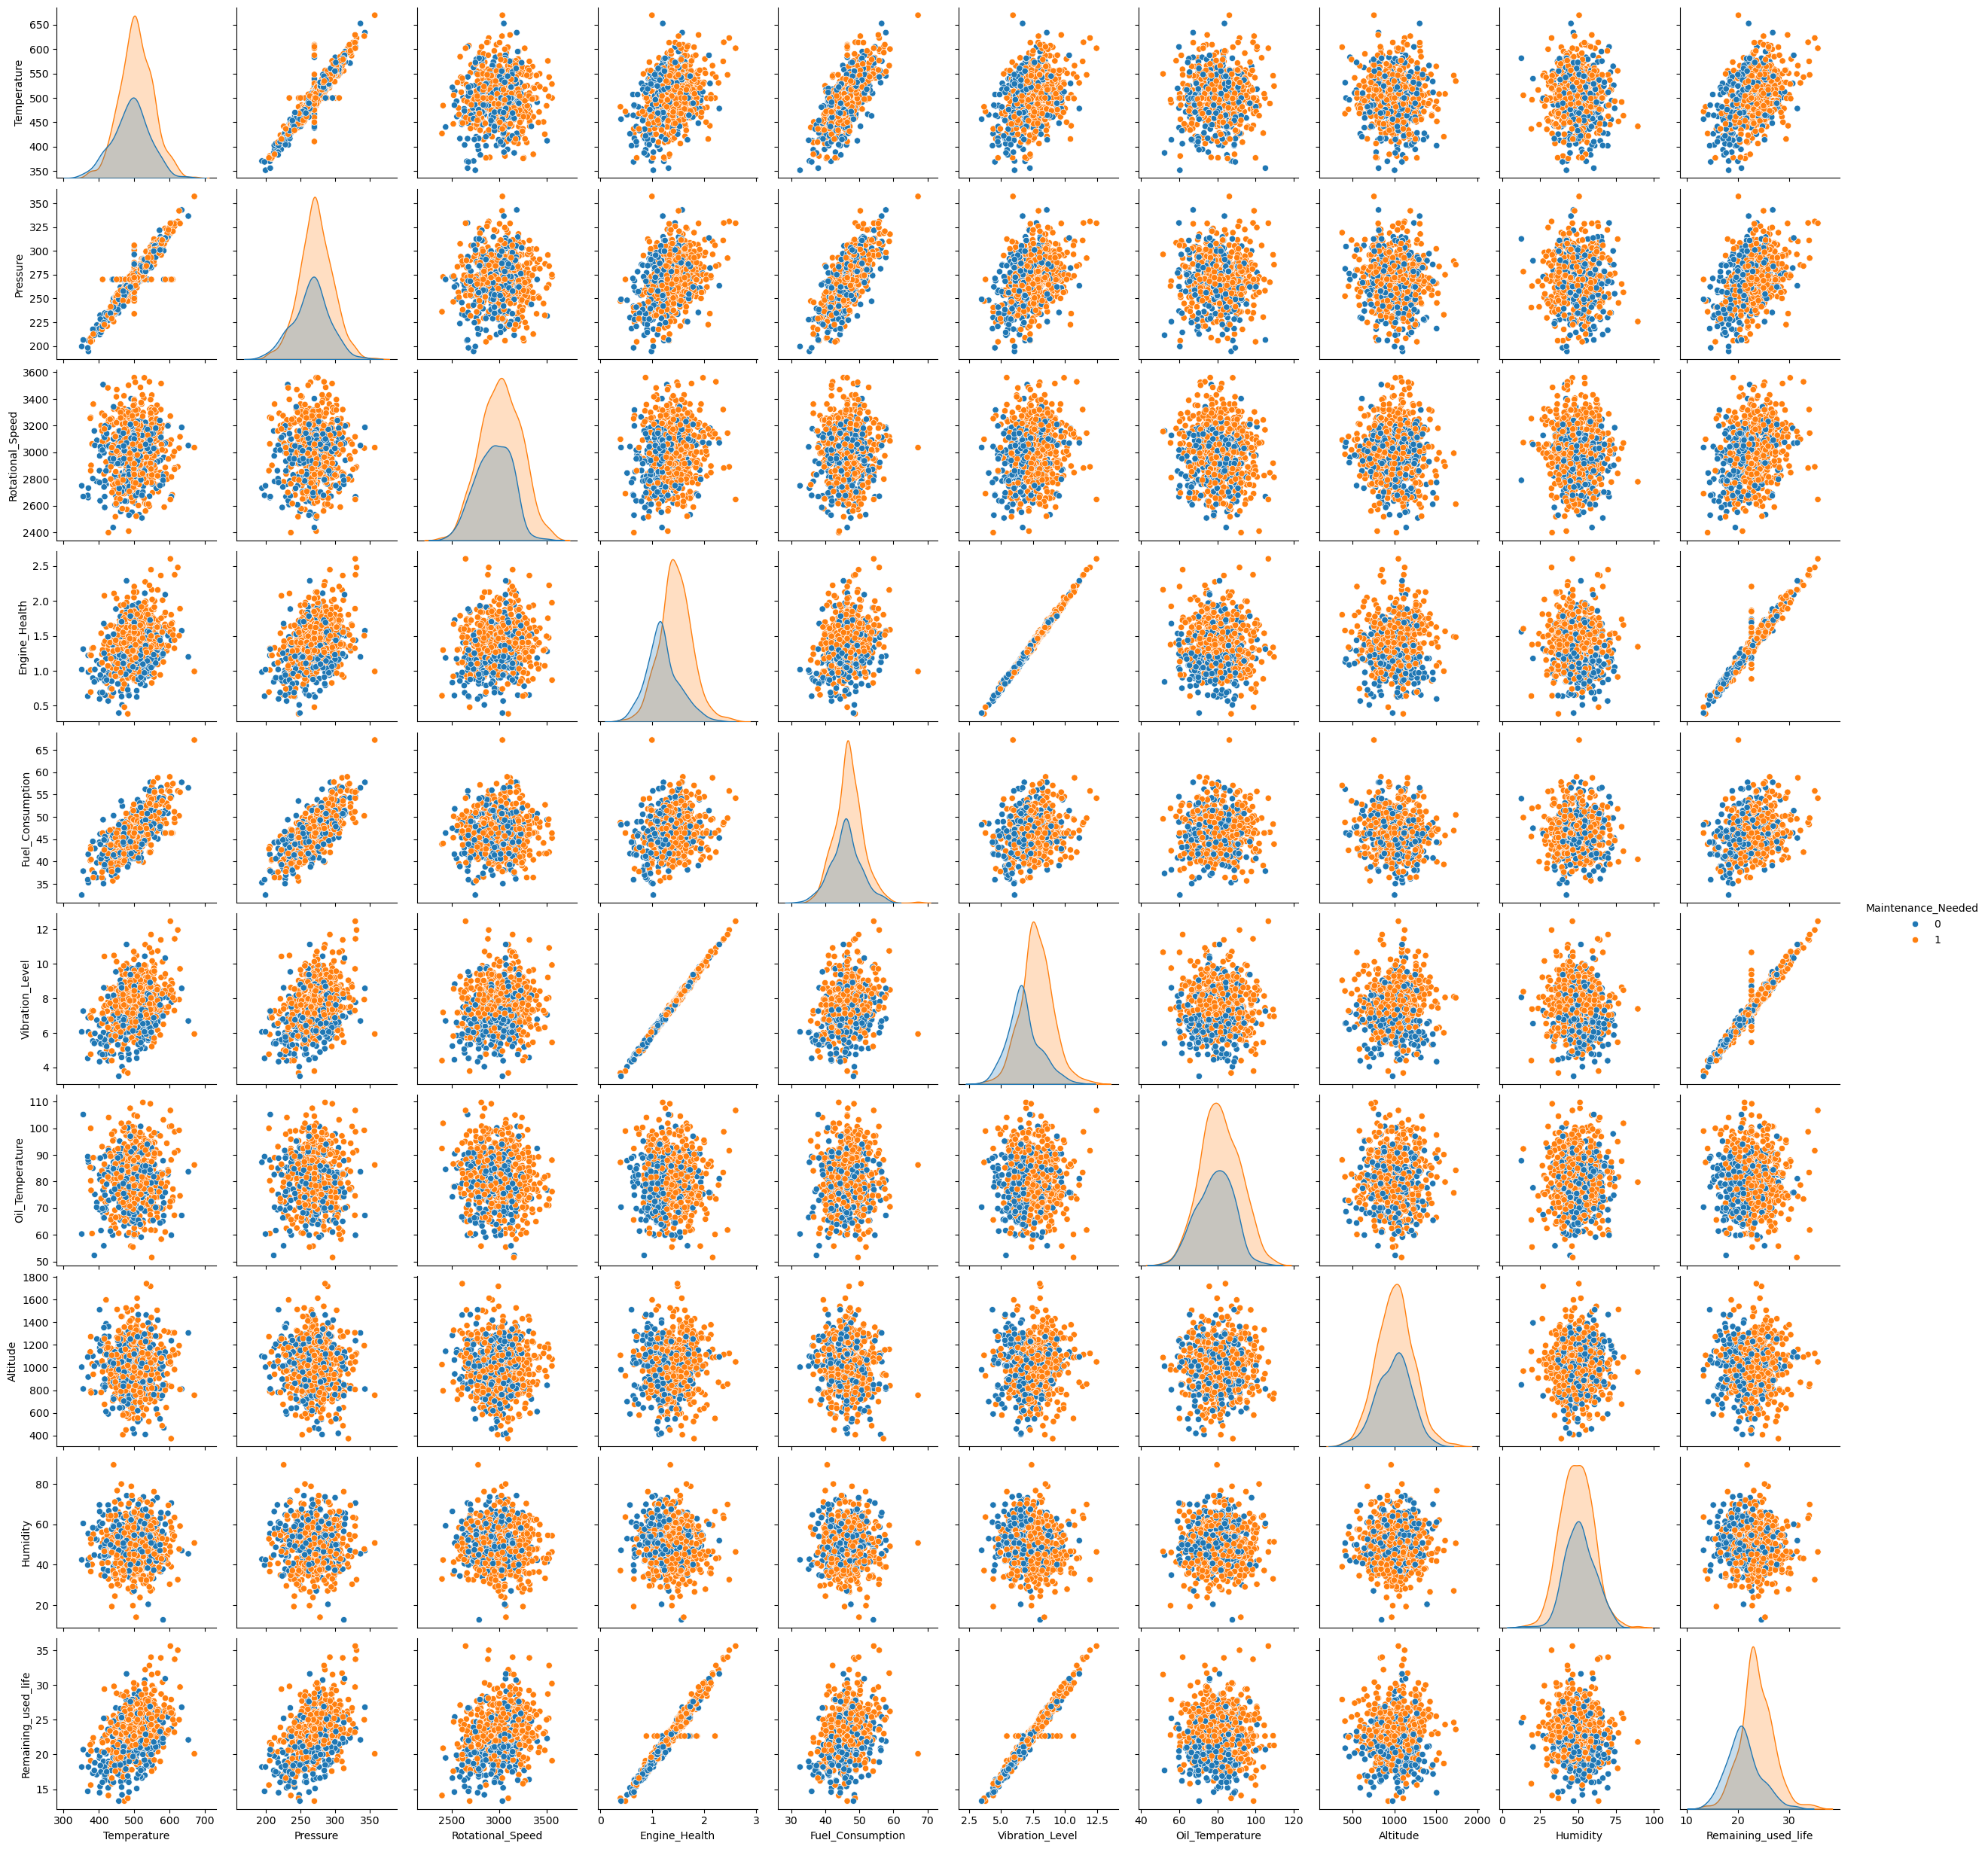

In [14]:
## 4.3 Bivariate Analysis - Pairplot
sns.pairplot(data[columns_to_check + ["Maintenance_Needed", "Remaining_used_life"]], hue="Maintenance_Needed")
plt.show()

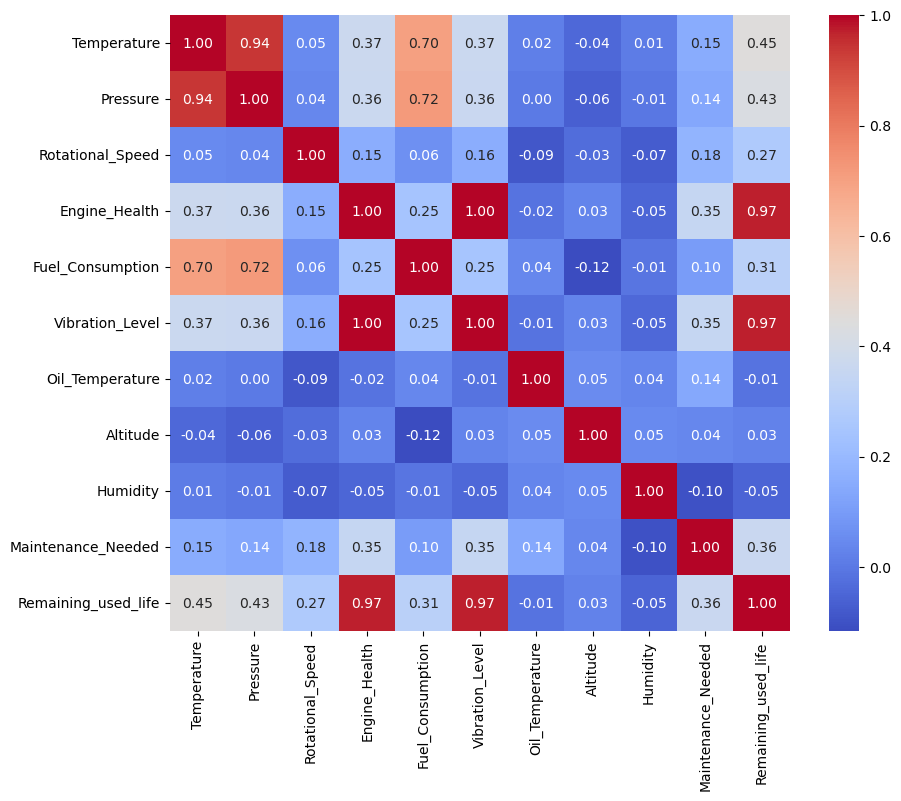

In [15]:
## 4.4 Multivariate Analysis - Correlation Heatmap
correlation_matrix = data[columns_to_check + ["Maintenance_Needed", "Remaining_used_life"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

### 5. Data Preparation for Modeling

In [17]:
## 5.1 Split Features and Labels
label = data[['Maintenance_Needed']]
features = data.drop(['Maintenance_Needed', 'Remaining_used_life', 'Unnamed: 0', 'Engine_ID', 'Timestamp'], axis=1)


In [18]:
## 5.2 Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(features, label.squeeze(), test_size=0.2, random_state=42)


In [19]:
## 5.3 Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Machine Learning Models

In [21]:
## 6.1 Initialize Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
}


Logistic Regression 

Accuracy: 69.44%
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.45      0.52        53
           1       0.72      0.84      0.78        91

    accuracy                           0.69       144
   macro avg       0.67      0.64      0.65       144
weighted avg       0.68      0.69      0.68       144

Confusion Matrix: 
 [[24 29]
 [15 76]]


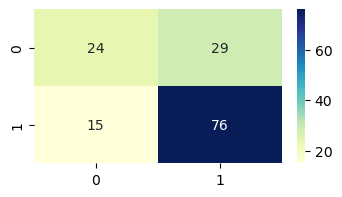

Decision Tree 

Accuracy: 63.19%
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.51      0.50        53
           1       0.71      0.70      0.71        91

    accuracy                           0.63       144
   macro avg       0.61      0.61      0.61       144
weighted avg       0.63      0.63      0.63       144

Confusion Matrix: 
 [[27 26]
 [27 64]]


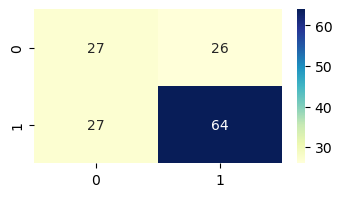

Random Forest 

Accuracy: 77.78%
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.60      0.67        53
           1       0.79      0.88      0.83        91

    accuracy                           0.78       144
   macro avg       0.77      0.74      0.75       144
weighted avg       0.77      0.78      0.77       144

Confusion Matrix: 
 [[32 21]
 [11 80]]


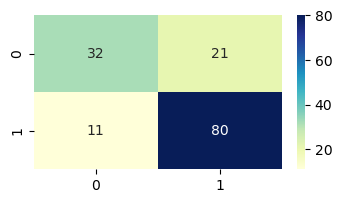

Support Vector Classifier 

Accuracy: 71.53%
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.40      0.51        53
           1       0.72      0.90      0.80        91

    accuracy                           0.72       144
   macro avg       0.71      0.65      0.65       144
weighted avg       0.71      0.72      0.69       144

Confusion Matrix: 
 [[21 32]
 [ 9 82]]


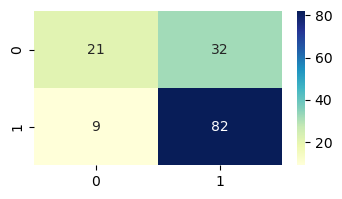

In [22]:
## 6.2 Train and Evaluate Models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred) * 100
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # Display Results
    print(f"{model_name} \n")
    print(f"Accuracy: {accuracy:.2f}%")
    print("Classification Report: \n", report)
    print("Confusion Matrix: \n", matrix)
    
    plt.figure(figsize=(4, 2))
    sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt='g')
    plt.show()

In [61]:
## 6.3 Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': np.logspace(-4, 4, 10),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 500]
}

## 6.4 Initialize Logistic Regression model
log_reg = LogisticRegression()

# 6.5 Randomized search for Logistic Regression
log_reg_random_search = RandomizedSearchCV(estimator=log_reg,
                                           param_distributions=log_reg_param_grid,
                                           n_iter=10,  # Number of random combinations to try
                                           scoring='roc_auc',
                                           cv=5,  # 5-fold cross-validation
                                           verbose=2,  # Show progress
                                           random_state=42,
                                           n_jobs=-1)  # Use all available cores

## 6.6 Fit model
log_reg_random_search.fit(X_train, y_train)
best_log_reg = log_reg_random_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [63]:
## 6.7 Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

## 6.8 Initialize Random Forest model
rf = RandomForestClassifier()

## 6.9 Randomized search for Random Forest
rf_random_search = RandomizedSearchCV(estimator=rf,
                                      param_distributions=rf_param_grid,
                                      n_iter=10,  # Number of random combinations to try
                                      scoring='roc_auc',
                                      cv=5,  # 5-fold cross-validation
                                      verbose=2,  # Show progress
                                      random_state=42,
                                      n_jobs=-1)  # Use all available cores

## 6.10 Fit model
rf_random_search.fit(X_train, y_train)
best_rf = rf_random_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


### 7. Cross-Validation

In [90]:
## 7.1 Cross-Validation for Logistic Regression
log_reg_auc = cross_val_score(best_log_reg, X_train, y_train, cv=5, scoring='roc_auc')
print("Logistic Regression AUC-ROC: ", np.mean(log_reg_auc))

## 7.2 Cross-Validation for Random Forest
rf_auc = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='roc_auc')
print("Random Forest AUC-ROC: ", np.mean(rf_auc))


Logistic Regression AUC-ROC:  0.7505520105471326
Random Forest AUC-ROC:  0.7910695671281038


### 8. AUC-ROC Curve

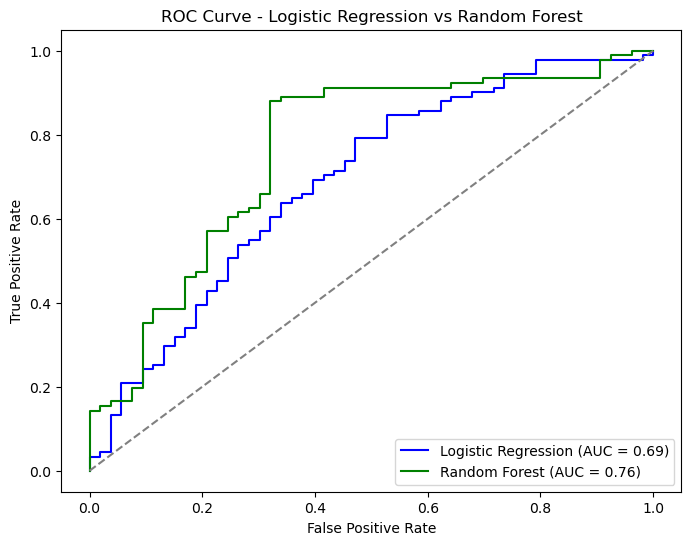

In [97]:
plt.figure(figsize=(8, 6))

## 8.1 Logistic Regression ROC curve
plt.plot(fpr_log, tpr_log, color='blue', label=f'Logistic Regression (AUC = {auc_log:.2f})')

## 8.2 Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {auc_rf:.2f})')

## 8.3 Reference line for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression vs Random Forest')
plt.legend(loc='lower right')
plt.show()


The Receiver Operating Characteristic (ROC) curves for the two machine learning models: Logistic Regression and Random Forest as shown above has the following features:

ROC Curve: The plot shows the True Positive Rate (sensitivity) against the False Positive Rate (1 - specificity) at various threshold settings.

Model Comparison:

The blue line represents the Logistic Regression model.
The green line represents the Random Forest model.
The gray dashed line represents the performance of a random classifier (AUC = 0.5).


Area Under the Curve (AUC):

Logistic Regression: AUC = 0.69
Random Forest: AUC = 0.76


Performance Comparison:
Both models perform better than random guessing (their curves are above the diagonal line).
The Random Forest model consistently outperforms the Logistic Regression model, as its curve is higher across most of the graph.


Model Characteristics:
The Random Forest curve shows a steeper initial climb, indicating better performance at lower false positive rates.
The Logistic Regression curve is smoother, while the Random Forest curve shows more steps, which is typical for ensemble methods.


Practical Implications:
The Random Forest model would likely be preferred for this particular task due to its higher AUC and better overall performance across different thresholds.

Model Performance:
Both models show moderate to good performance, with AUC values between 0.6 and 0.8.
There's still room for improvement, as neither model approaches perfect classification (AUC = 1.0).



In conclusion, while both models demonstrate predictive capability better than random guessing, the Random Forest model shows superior performance in this case, as indicated by its higher AUC score and generally better ROC curve. The specific choice of model and operating point on the ROC curve would depend on the particular requirements of the application, such as the relative costs of false positives versus false negatives.

### 9. Save the Models

In [102]:
import pickle

## 9.1 Save the best Logistic Regression model
with open('best_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_log_reg, file)


## 9.2 Save the best Random Forest model
with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)
